## Week 7 Part 2
For a given image, compute at every pixel the inner product between the gradient of the Laplacian and the level lines normal, this being the main term in one of the inpainting techniques we learned. Display it and analyze its behavior. 

In [5]:
from __future__ import division, print_function

import numpy as np
from matplotlib import pyplot as plt
import time

from skimage import img_as_float
from skimage import io
from skimage.color import rgb2gray

%matplotlib inline

# Plotting functions

def plot_1xc(imgs_list, titles_list, save_file=None):
    cols = len(imgs_list)
    i = 0
    
    fig, axes = plt.subplots(nrows=1, ncols=cols, figsize=(15,15))
    for c in range(cols):
        axes[c].imshow(imgs_list[i], cmap="gray", interpolation="nearest")
        axes[c].set_title(titles_list[i], size=20)
        axes[c].set_xticks([])
        axes[c].set_yticks([])
        i = i + 1
    plt.tight_layout();
    
    if not (save_file == None):
        filename = time.strftime("%Y%m%d_%H%M") + "_" + save_file + ".png"
        fig.savefig(filename, bbox_inches='tight')
        
def plot_rxc(imgs_list, titles_list, ncol=3, save_file=None):
    cols = ncol
    rows = np.ceil(len(imgs_list)/cols).astype(int)
    if rows==1:
        plot_1xc(imgs_list, titles_list, save_file)
    else:
        i = 0
    
        fig, axes = plt.subplots(nrows=rows, ncols=cols, figsize=(15,15*rows/cols))
        for r in range(rows):
            for c in range(cols):
                if i < len(imgs_list):
                    axes[r,c].imshow(imgs_list[i], cmap="gray", interpolation="nearest")
                    axes[r,c].set_title(titles_list[i], size=20)
                    axes[r,c].set_xticks([])
                    axes[r,c].set_yticks([])
                i = i + 1
        plt.tight_layout();
    
        if not (save_file == None):
            filename = time.strftime("%Y%m%d_%H%M") + "_" + save_file + ".png"
            fig.savefig(filename, bbox_inches='tight')

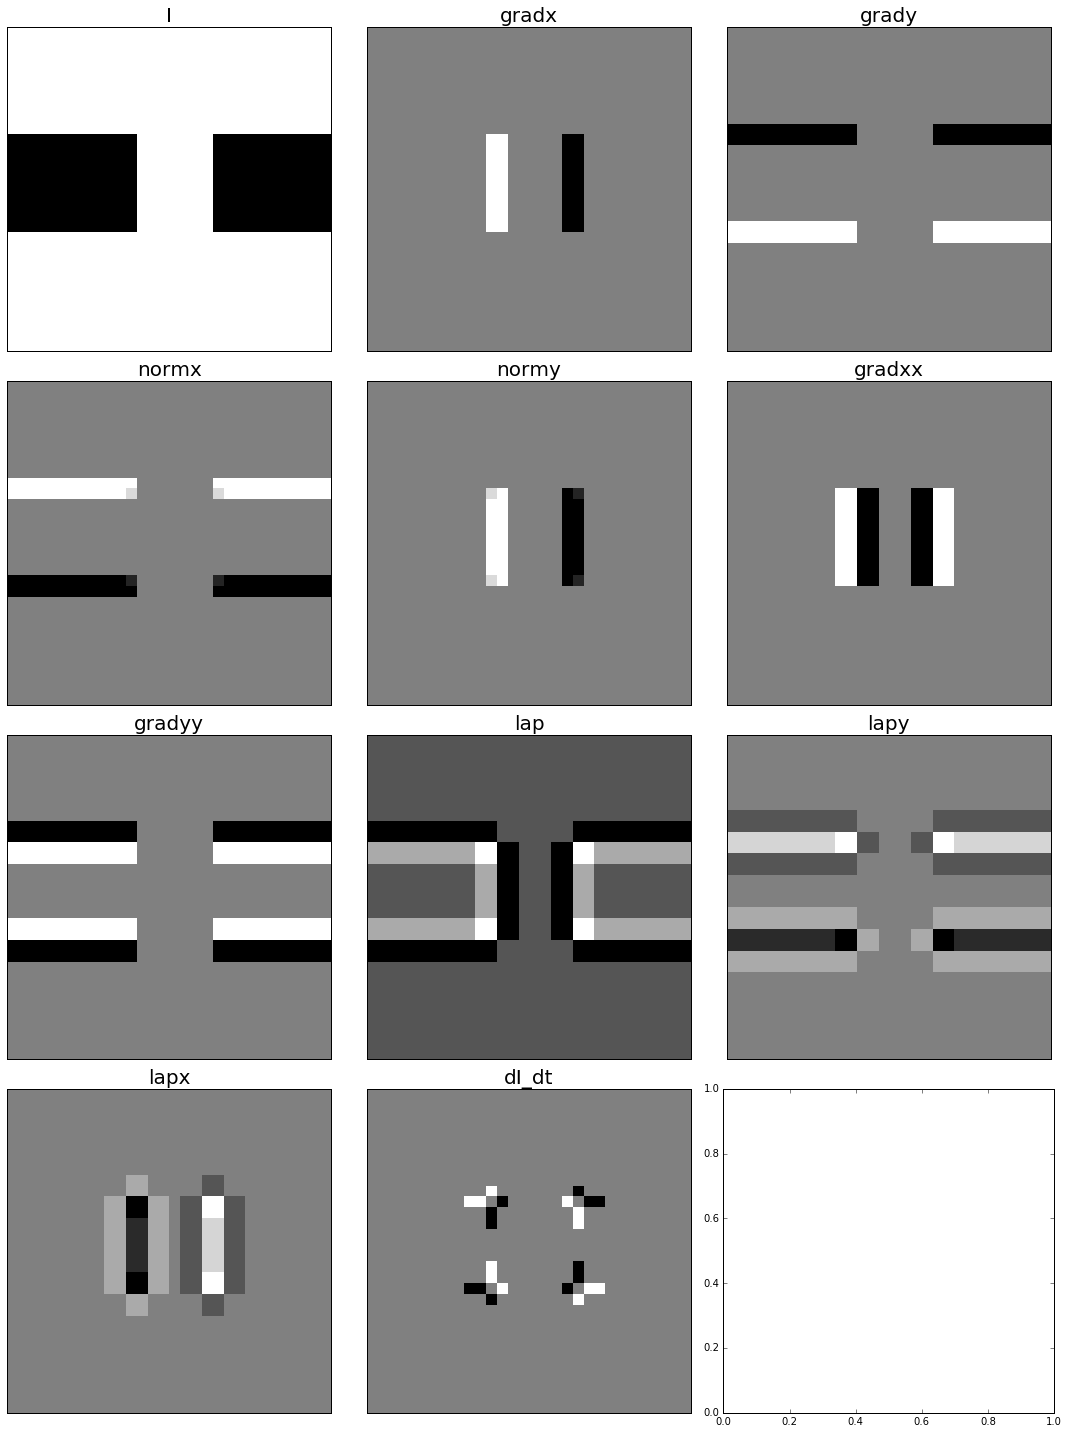

In [53]:
O = io.imread("../images/inpainting_bar.png")
O = img_as_float(O)
I = rgb2gray(O)
O = io.imread("../images/inpainting_mask.png")
O = img_as_float(O)
M = rgb2gray(O)



grady, gradx = np.gradient(I)
gradm = np.sqrt(gradx**2 + grady**2)
normx = -grady/(gradm + (gradm==0))
normy = gradx/(gradm + (gradm==0))
# normm = np.sqrt(normx**2 + normy**2)
gradxy, gradxx = np.gradient(gradx)
gradyy, gradyx = np.gradient(grady)
lap = gradxx + gradyy
lapy, lapx = np.gradient(lap)
dI_dt = normx*lapx + normy*lapy

ims = [I, gradx, grady, normx, normy, gradxx, gradyy, lap, lapy, lapx, dI_dt]
titles = ["I", "gradx", "grady", "normx", "normy", "gradxx", "gradyy", "lap", "lapy", "lapx", "dI_dt"]
plot_rxc(ims, titles)

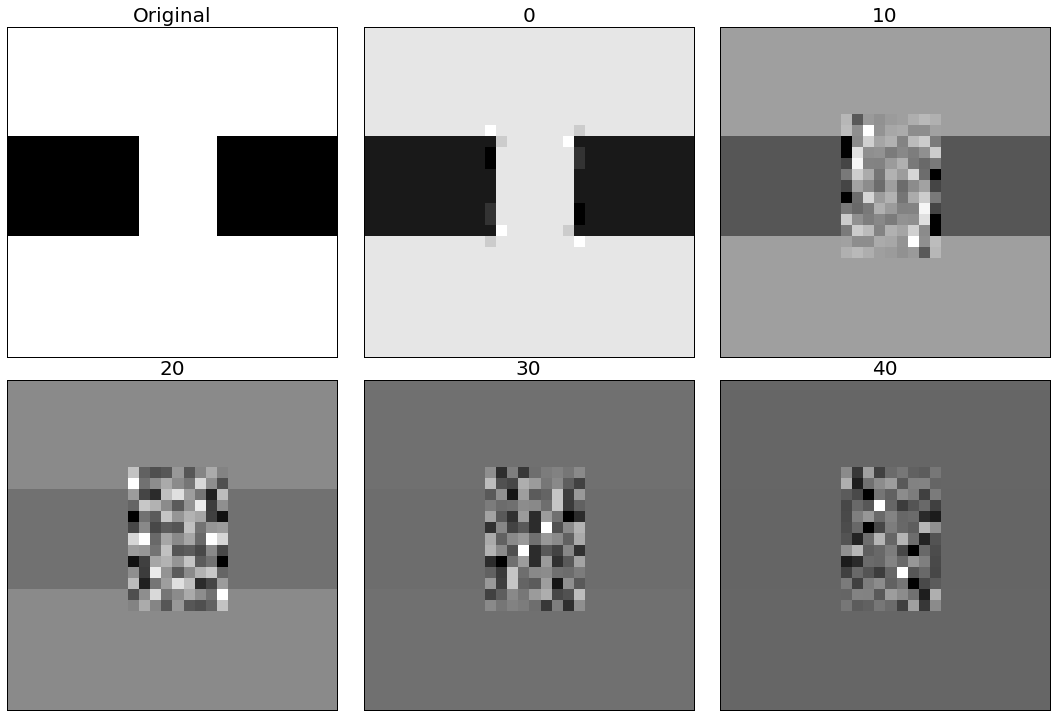

In [69]:
O = io.imread("../images/inpainting_bar.png")
O = img_as_float(O)
I = rgb2gray(O)
O = io.imread("../images/inpainting_mask.png")
O = img_as_float(O)
M = rgb2gray(O)

def dIdt(I):
    grady, gradx = np.gradient(I)
    gradm = np.sqrt(gradx**2 + grady**2)
    normx = -grady/(gradm + (gradm==0))
    normy = gradx/(gradm + (gradm==0))
    # normm = np.sqrt(normx**2 + normy**2)
    gradxy, gradxx = np.gradient(gradx)
    gradyy, gradyx = np.gradient(grady)
    lap = gradxx + gradyy
    lapy, lapx = np.gradient(lap)
    dI_dt = normx*lapx + normy*lapy
    return dI_dt

def rescale(v):
    min = np.min(v)
    max = np.max(v)
    return (v-min)/(max-min)

I_old = I.copy()
mask = M == 1
ims = []
titles = []
ims.append(I_old)
titles.append("Original")

n = 50
n_out = 5
n_each = int(n/n_out)

for i in range(n):
    d = dIdt(I_old)
    d[~ mask] = 0
    I_new = I_old + d
    # I_new[mask] = rescale(d[mask])
    if not i%n_each:
        ims.append(I_new)
        titles.append(str(i))
    I_old = I_new

plot_rxc(ims, titles)

In [49]:
print(I[mask])

[ 1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  0.  1.  1.  1.  1.  1.  1.  1.  0.  0.  1.  1.  1.  1.  1.  1.  1.  0.
  0.  1.  1.  1.  1.  1.  1.  1.  0.  0.  1.  1.  1.  1.  1.  1.  1.  0.
  0.  1.  1.  1.  1.  1.  1.  1.  0.  0.  1.  1.  1.  1.  1.  1.  1.  0.
  0.  1.  1.  1.  1.  1.  1.  1.  0.  0.  1.  1.  1.  1.  1.  1.  1.  0.
  0.  1.  1.  1.  1.  1.  1.  1.  0.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.]
